In [1]:
import torch
from torch.utils.data import DataLoader
import numpy as np
import os
import matplotlib.pyplot as plt
import skimage.measure
import scipy.ndimage
from scipy.interpolate import interp2d

from src.datasets import BiosensorDataset, create_datasets
from src.test_models.test_parts import *
from src.train import train_model
from src.evaluate import evaluate
from src.utils import *

c:\Users\wittd\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [5]:
data_path = 'C:/onlab_git/Onlab/data_with_centers/'
train_percent = 0.614
test_percent = 0.30


files = os.listdir(data_path)
train_size = int(train_percent * len(files))
val_size = len(files) - train_size
if test_percent>0:
    test_size = int(test_percent * len(files))
    val_size = val_size - test_size

print('Train size:', train_size)
print('Validation size:', val_size)
print('Test size:', test_size)

Train size: 100
Validation size: 15
Test size: 48


In [27]:
wrong_masks = ['33.npz', '38.npz', '56.npz', '58.npz', '59.npz', '68.npz', '78.npz', '99.npz', '100.npz', '103.npz', '106.npz', '108.npz', '109.npz', '110.npz', '112.npz', '113.npz', '119.npz', '121.npz', '123.npz', '130.npz', '131.npz', '143.npz']

print(wrong_masks)

['33.npz', '38.npz', '56.npz', '58.npz', '59.npz', '68.npz', '78.npz', '99.npz', '100.npz', '103.npz', '106.npz', '108.npz', '109.npz', '110.npz', '112.npz', '113.npz', '119.npz', '121.npz', '123.npz', '130.npz', '131.npz', '143.npz']


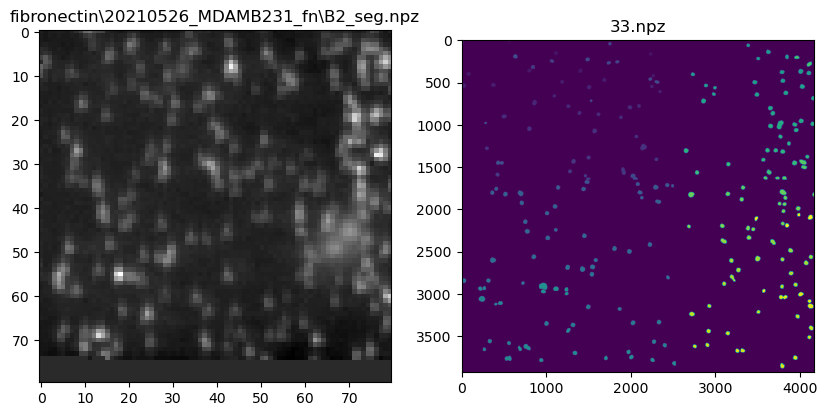

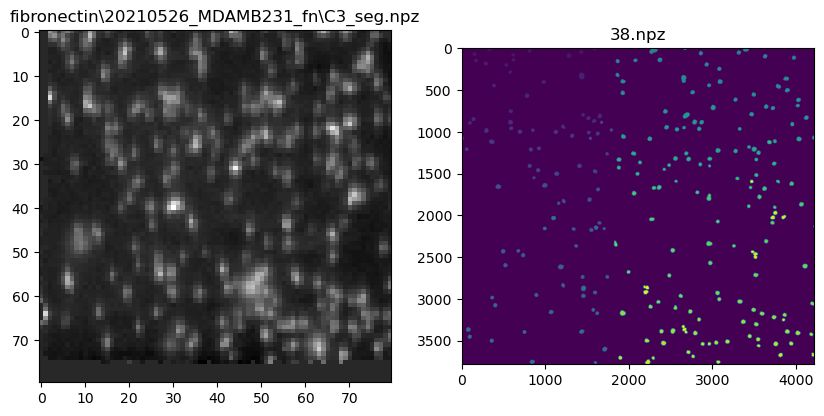

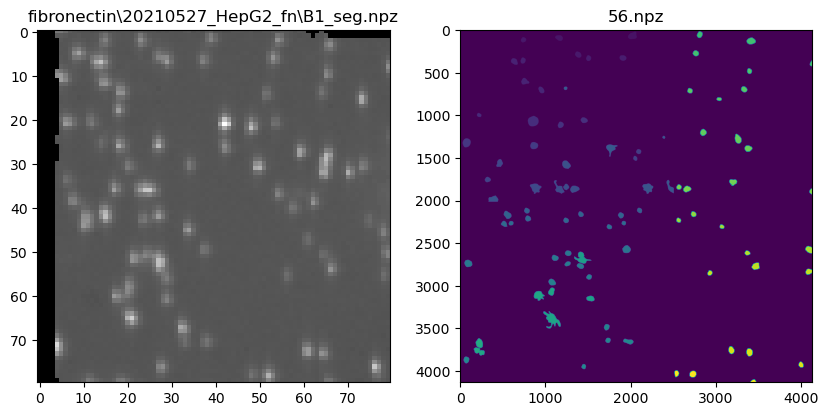

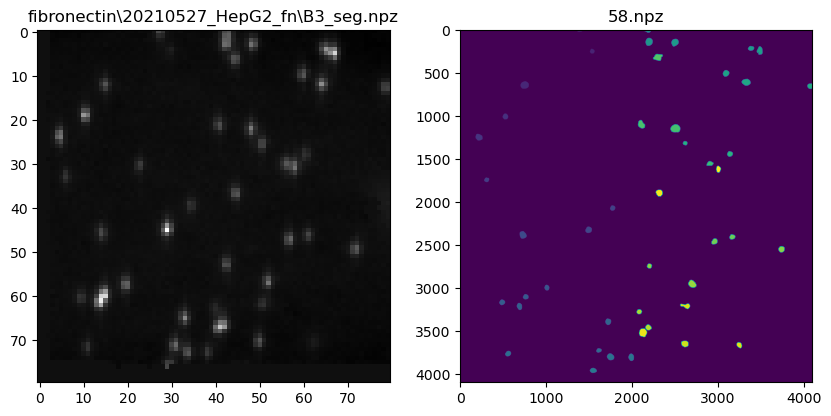

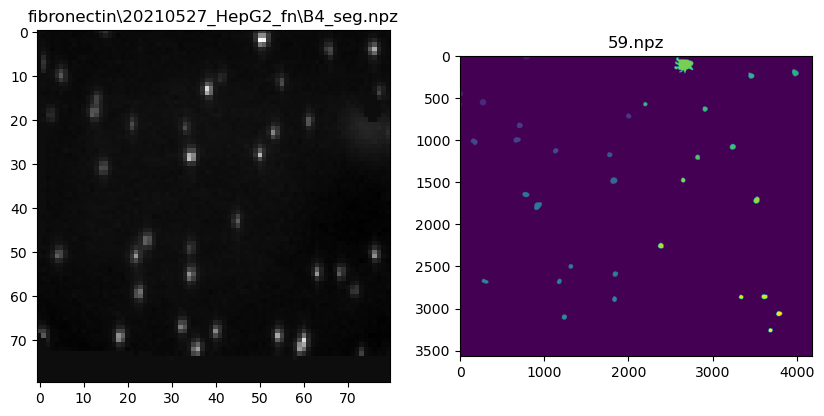

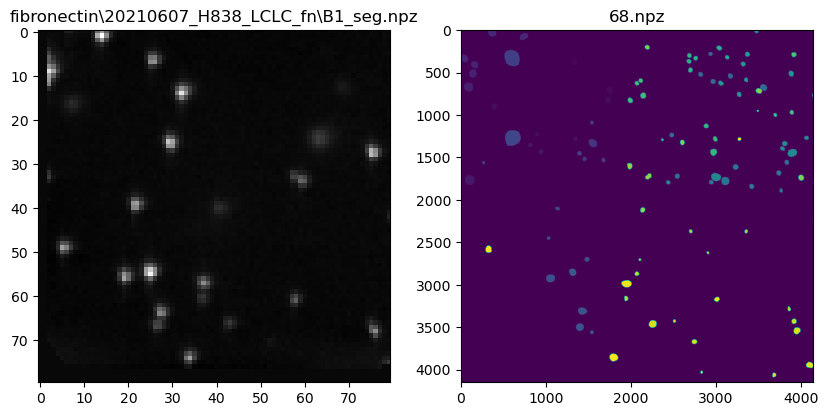

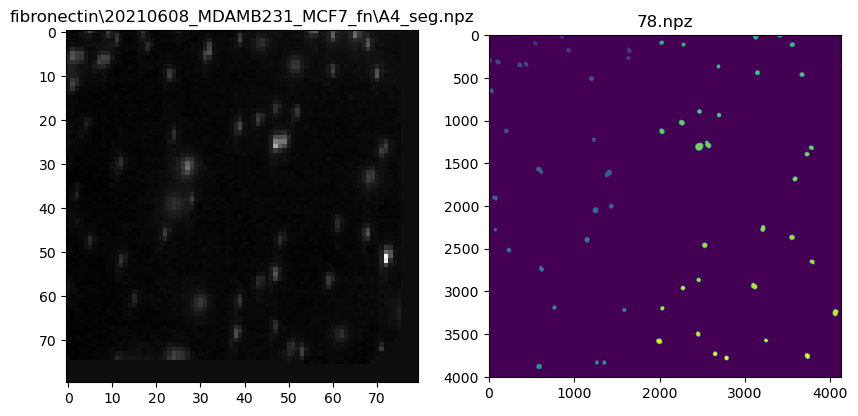

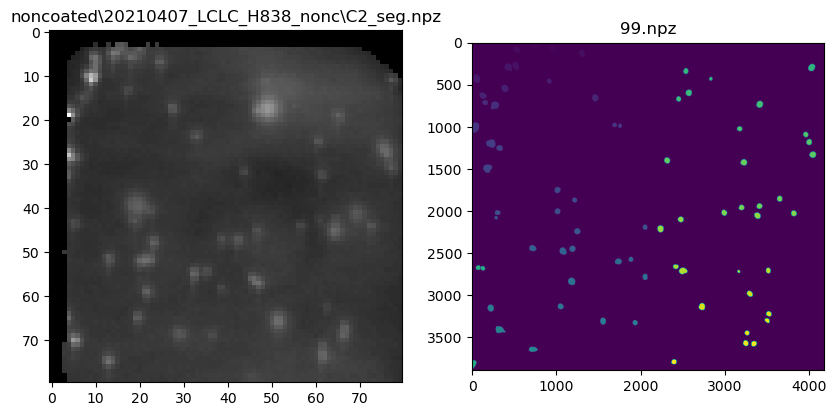

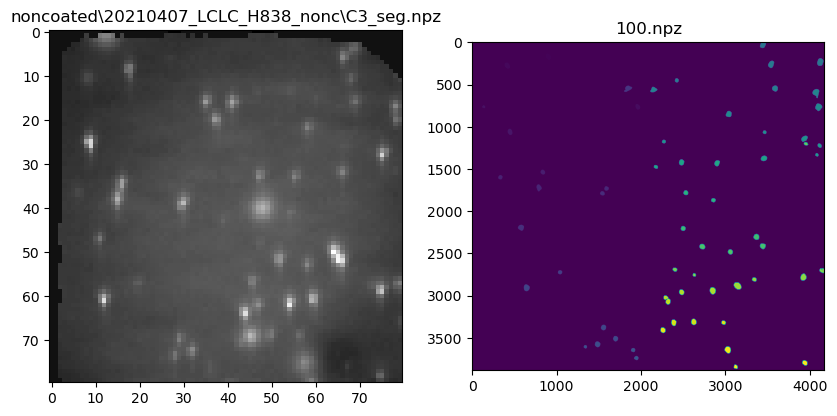

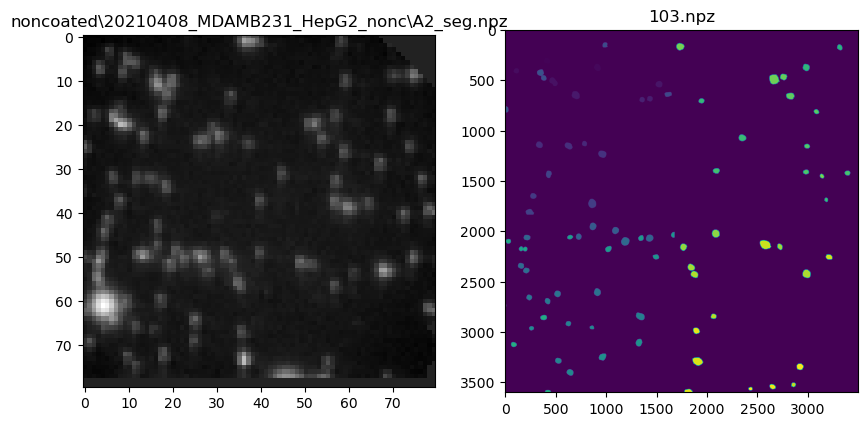

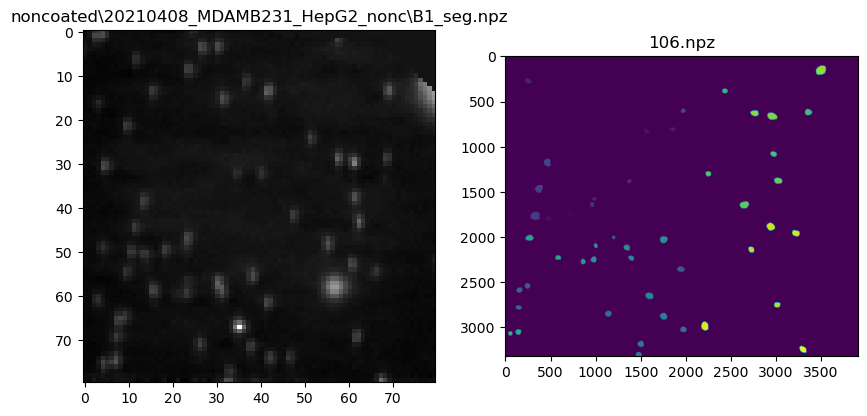

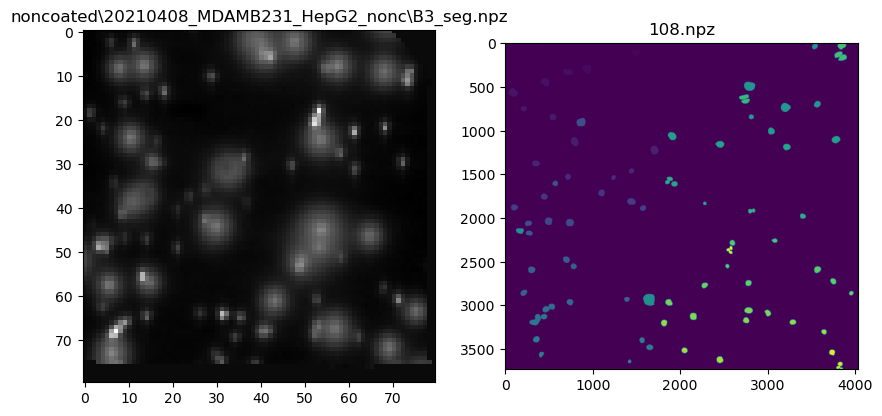

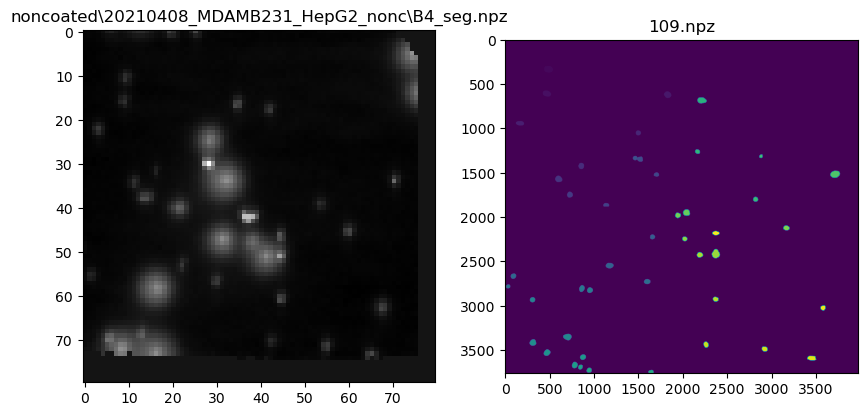

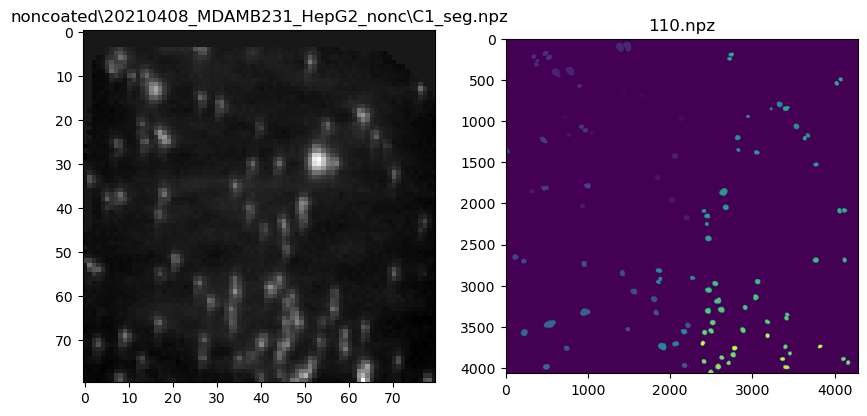

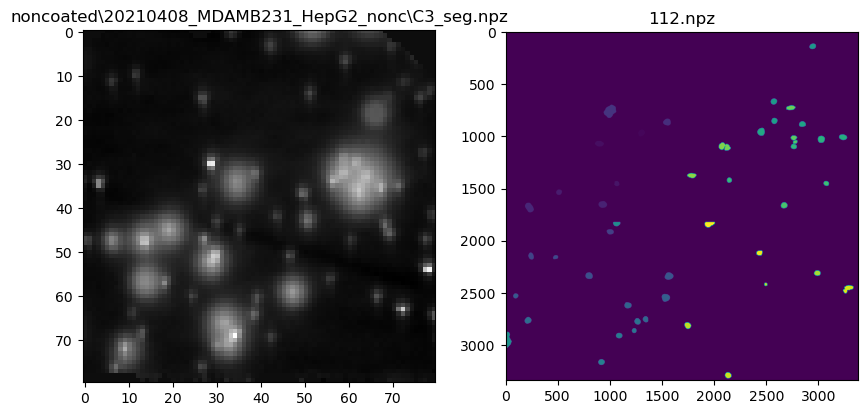

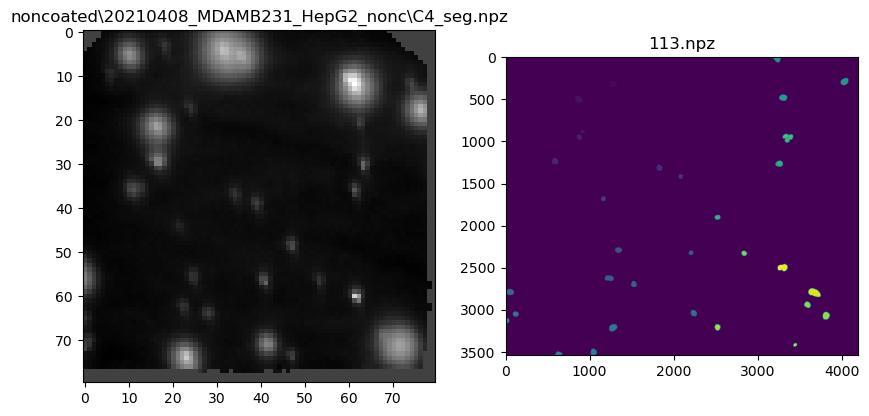

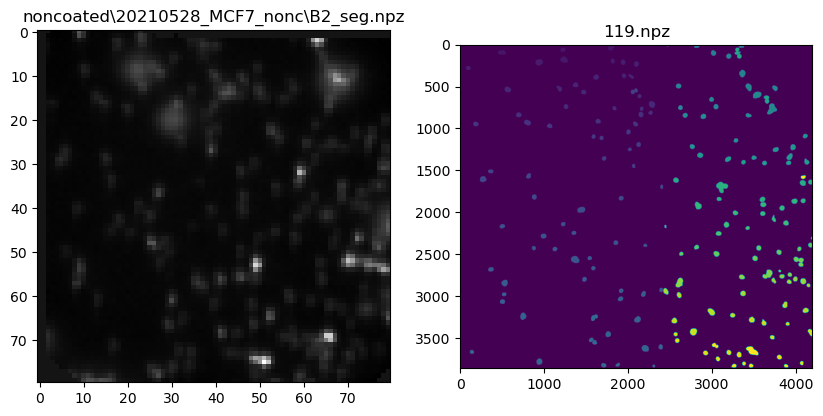

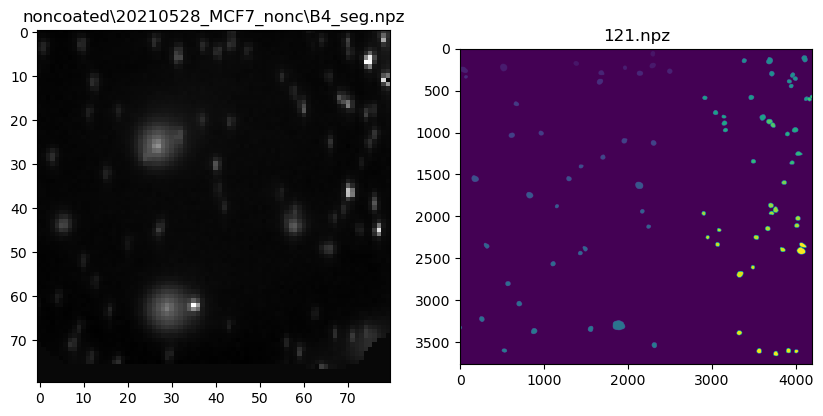

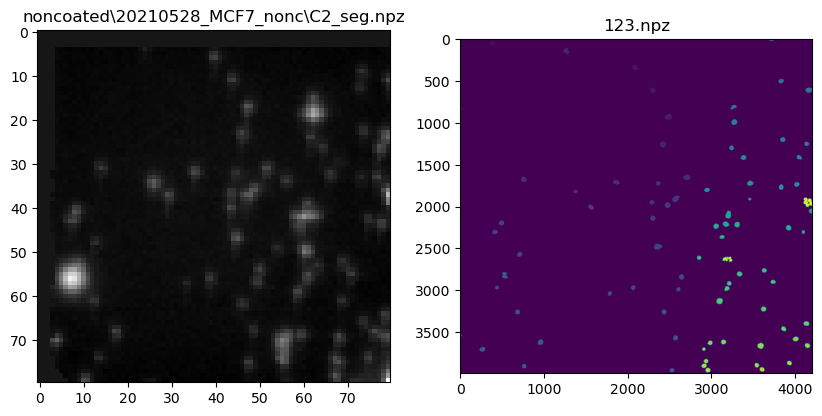

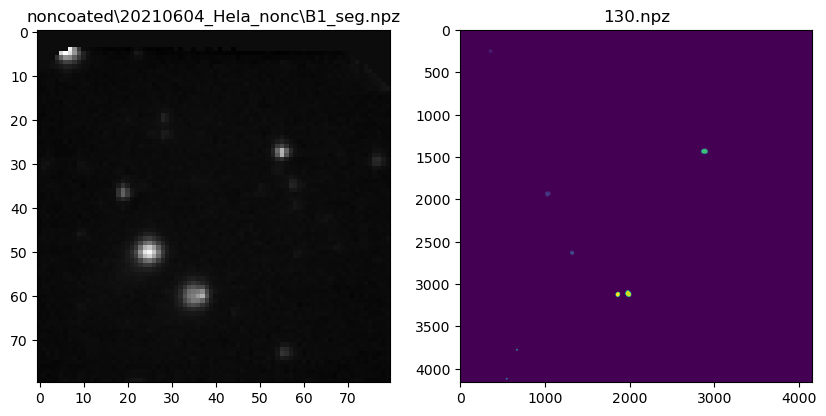

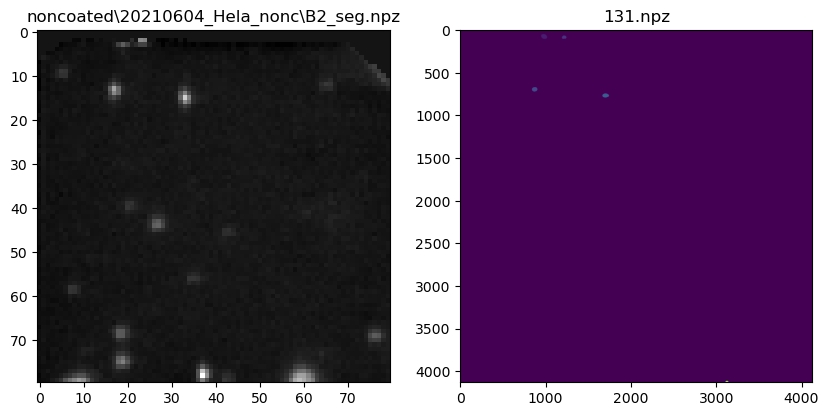

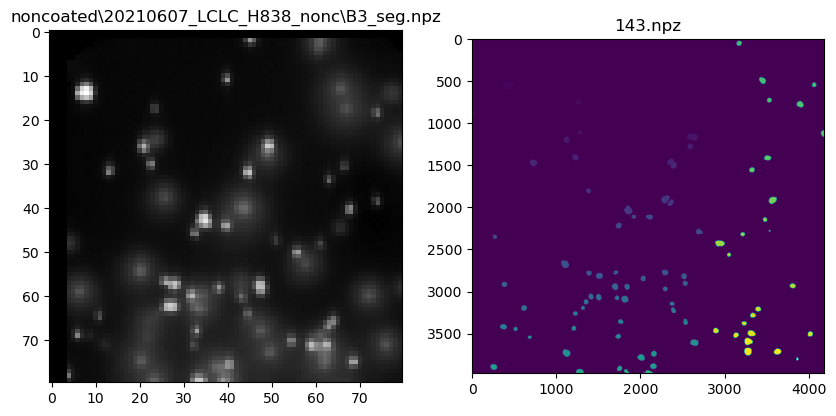

In [32]:
for file in wrong_masks:

    data = np.load(data_path + file)
    bio = data['biosensor'].astype(np.float32)
    name = data['old_filename']

    plt.figure(figsize=(10, 10))
    
    plt.subplot(1, 2, 1)
    plt.imshow(bio[-1], cmap='gray')
    plt.title(name)

    plt.subplot(1, 2, 2)
    plt.imshow(data['mask'])
    plt.title(file)
    plt.show()

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device {device}')

torch.manual_seed(42)
np.random.seed(42)

data_path = 'C:/onlab_git/Onlab/data_with_centers/'
checkpoint_dir = 'test_saves'
train_percent = 0.614
test_percent = 0.30
batch_size = 4
bio_len = 8
mask_size = 80*4

train_dataset, val_dataset, test_dataset = create_datasets(data_path, train_percent, bool, test_percent=test_percent, 
                                biosensor_length=bio_len, mask_size=mask_size, augment=False, 
                                dilation=0, input_scaling=True, upscale_mode='nearest') # nearest bilinear bicubic

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# model = UNet(n_channels=bio_len, n_classes=1) #UNet4 UNet8
# model = model.to(device)

Using device cuda
